# Dynamic Pricing: An AI-powered Approach to Retail Pricing

## 1. Problem Statement

Setting the right prices for products is a critical aspect of business strategy, directly impacting profitability and competitiveness. Dynamic pricing, an approach where prices are adjusted in real time based on market trends, competitor pricing, and customer behavior, can optimize this process. However, this requires complex data analysis which can be challenging for non-technical users.

## 2. Data Description

This script uses a simple data model with three columns:

- product_cost: This represents the cost of the product to the retailer. For instance, if a retailer purchases a product for $20, this would be the product cost.

- expected_margin: This is the profit margin that the retailer expects to make on the product, expressed as a decimal. For example, an expected margin of 0.2 represents a 20% expected profit margin.

- competitor_price: This is the current price of the product as offered by a competitor. For example, if a competitor sells the same product for $25, this would be the competitor price.

To populate this data, the user would need to input their cost data, desired margins, and the competitor's pricing, which could be obtained from market research or price comparison websites.

## 3. User Instructions

To use the results:

1. Open the `dynamic_pricing.csv` file to view the data used and the dynamic prices calculated by the script.
2. Compare the dynamic price to the current selling price. If the dynamic price is higher, consider increasing the price; if it's lower, consider reducing the price.
3. Use the plot as a visual representation to see how the dynamic price compares to the competitor's price.

## 4. Future Improvements

While this script provides a basic implementation of dynamic pricing, there are several areas where it could be improved:

- Incorporation of real-time data: Connect to APIs or implement web scraping to obtain real-time market and competitor data.
- More sophisticated pricing algorithms: Use machine learning algorithms to make more accurate pricing predictions based on larger and more complex data sets.
- User interface: Develop a user-friendly interface for non-technical users to input data and view results.
- Customer behavior: Include customer behavior analysis in the pricing model, such as elasticity of demand, purchasing trends, etc.

Please note that some of these improvements would likely require installation of additional Python libraries, which may not be available in Google Colab by default.


## For one product:
Input the following values can press `Calculate Dynamic`.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define widgets
product_cost_label = widgets.Label('Product Cost:')
product_cost = widgets.FloatText()
expected_margin_label = widgets.Label('Expected Margin:')
expected_margin = widgets.FloatText()
competitor_price_label = widgets.Label('Competitor Price:')
competitor_price = widgets.FloatText()
button = widgets.Button(description='Calculate Dynamic Price', button_style='success') # 'success' corresponds to green

display( product_cost_label, product_cost, expected_margin_label, expected_margin, competitor_price_label, competitor_price, button)

output = widgets.Output()
display(output)

# Function to calculate dynamic price
def dynamic_price(product_cost, expected_margin, competitor_price):
    # Dynamic price is calculated as the maximum of (product cost + expected margin) and (competitor price - 10%)
    dynamic_price = max(product_cost * (1 + expected_margin), competitor_price * 0.9)
    return dynamic_price

# Function to handle button click
def on_button_clicked(b):
    with output:
        price = dynamic_price(product_cost.value, expected_margin.value, competitor_price.value)
        print(f'Dynamic price for this product is {price}')

button.on_click(on_button_clicked)


Label(value='Product Cost:')

FloatText(value=0.0)

Label(value='Expected Margin:')

FloatText(value=0.0)

Label(value='Competitor Price:')

FloatText(value=0.0)

Button(button_style='success', description='Calculate Dynamic Price', style=ButtonStyle())

Output()

# For multiple products:
Fill out the spreed sheet 

FileUpload(value={}, accept='.csv', description='Upload')

              product_cost  expected_margin  competitor_price  dynamic_price
product_name                                                                
Product A               20             0.20                25          24.00
Product B               30             0.15                35          34.50
Product C               25             0.25                30          31.25


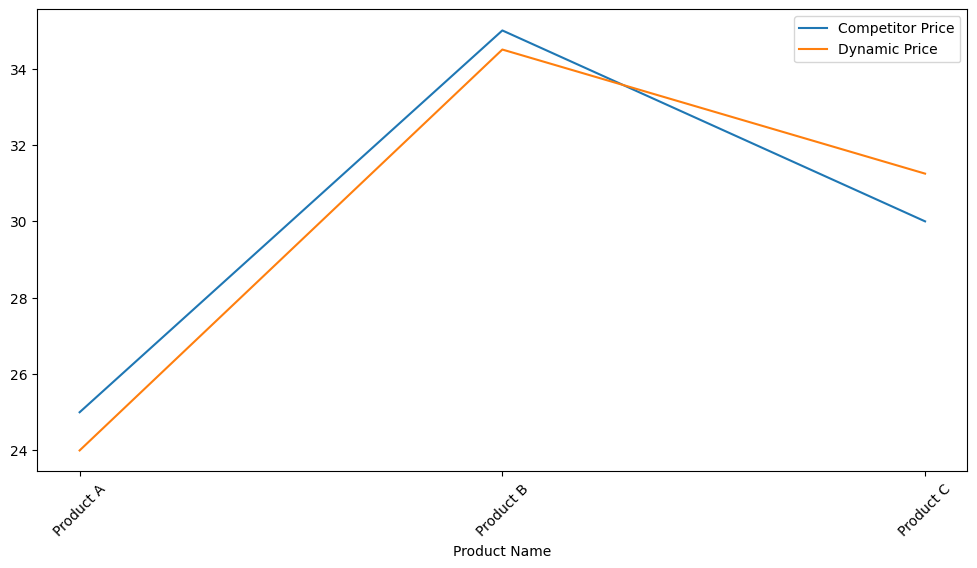

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import FileUpload

# Create an upload button
upload = FileUpload(accept='.csv')

# Display the upload button
display(upload)

# Once the file is uploaded, use this function to handle the data
def on_upload_change(change):
    # Take the uploaded file data
    uploaded_file = upload.value[upload.metadata[0]['name']]['content']
    
    # Convert bytes to pandas DataFrame
    df = pd.read_csv(io.BytesIO(uploaded_file))
    
    # Set 'product_name' as the index
    df.set_index('product_name', inplace=True)

    # Run the dynamic pricing function
    df = dynamic_price(df)
    
    # Show dynamic prices
    print(df)

    # Plot dynamic prices vs competitor prices
    plt.figure(figsize=(12,6))  # Increase the size of the plot for better visibility
    plt.plot(df['competitor_price'], label = 'Competitor Price')
    plt.plot(df['dynamic_price'], label = 'Dynamic Price')
    plt.xlabel('Product Name')  # Label x-axis
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.legend()
    plt.show()

# Function to calculate dynamic price
def dynamic_price(df):
    # Dynamic price is calculated as the maximum of (product cost + expected margin) and (competitor price - 10%)
    df['dynamic_price'] = df[['product_cost', 'expected_margin', 'competitor_price']].apply(lambda x: max(x[0]*(1+x[1]), x[2]*0.9), axis = 1)
    return df

# Call the function when a file is uploaded
upload.observe(on_upload_change, names='_counter')


In [ ]:
#@title  { run: "auto" }
#@title
import pandas as pd
import ipywidgets as widgets
from google.colab import files

# Function to create input data
def create_data(product_name, product_cost, expected_margin, competitor_price):
    data = {'Product Cost': product_cost, 'Expected Margin': expected_margin, 'Competitor Price': competitor_price}
    df = pd.DataFrame(data, index = product_name)
    return df

# Sample data
product_names = ['Product A', 'Product B', 'Product C']
product_costs = [20, 30, 40]
expected_margins = [0.2, 0.15, 0.25]
competitor_prices = [25, 35, 50]

# Create DataFrame
df = create_data(product_names, product_costs, expected_margins, competitor_prices)

# Function to create and download Excel file
def create_and_download_excel(button):
    df.to_excel('product_data.xlsx')
    files.download('product_data.xlsx')

# Create button
download_button = widgets.Button(description="Download a sample Excel file", 
                                 button_style='success', 
                                 layout=widgets.Layout(width='auto'))

download_button.on_click(create_and_download_excel)
display(download_button)


Button(button_style='success', description='Download a sample Excel file', layout=Layout(width='auto'), style=…

In [ ]:
#@title


In [2]:
from IPython.display import Image

# Specify the file path of the uploaded GIF file
gif_path = 'https://drive.google.com/file/d/127oc0wJchjVa9pHPUPx5B01rMTaUrXI_/view?usp=sharing'  # Replace with the copied file path

# Display the GIF image
Image(url=gif_path)


![Your GIF](https://drive.google.com/uc?id=127oc0wJchjVa9pHPUPx5B01rMTaUrXI_)


In [3]:
!pip list


Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
build                         0.10.0
CacheControl                  0.12.11
cac